In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
sns.set(color_codes=True)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score , precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore')

#### based on prior inspection of the train.csv file, we are parsing the date columns as datetime objects 

In [3]:
train=pd.read_csv('train.csv',parse_dates=['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'])

In [4]:
train.sample(10)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
4700,FIN1004701,492001,2007-11-05,492099.0,M,1967-04-15,M,Others,Class XII,2006-08-22,Level 1,Level 1,2.0,Confirmation,M,1966-12-08,2.0,1.0,188831.0,6.0,188831.0,6.0,1
717,FIN1000718,474008,2007-05-04,474009.0,M,1984-01-25,S,Others,Class XII,2005-08-29,Level 1,Level 2,3.0,Confirmation,M,1979-03-02,0.0,0.0,74777.0,6.0,74777.0,6.0,0
1799,FIN1001800,560001,2007-06-11,560043.0,M,1944-02-15,M,Salaried,Class XII,2007-04-12,Level 2,Level 4,5.0,Probation,M,1975-06-15,4.0,0.0,0.0,0.0,0.0,0.0,1
2657,FIN1002658,380015,2007-07-21,380052.0,M,1981-08-25,M,Salaried,Class XII,2001-10-01,Level 2,Level 3,4.0,Confirmation,M,1961-03-24,5.0,1.0,10400.0,1.0,10400.0,1.0,0
373,FIN1000374,209625,2007-04-24,209743.0,M,1980-07-04,M,Business,Class XII,2004-05-04,Level 1,Level 3,4.0,Confirmation,M,1967-09-16,0.0,0.0,239089.0,17.0,239089.0,17.0,0
3830,FIN1003831,530003,2007-09-17,532214.0,M,1985-06-08,S,Salaried,Class XII,2007-06-13,Level 1,Level 1,2.0,Probation,M,1972-06-16,6.0,2.0,34402.0,2.0,34402.0,2.0,1
7873,FIN1007874,476001,2008-04-26,474003.0,M,1979-10-07,M,NaN,Graduate,2008-01-19,Level 2,Level 2,3.0,Probation,M,1976-06-12,0.0,1.0,30113.0,2.0,30113.0,2.0,0
6366,FIN1006367,250001,2007-12-29,250001.0,M,1979-09-30,M,Business,Masters of Business Administration,2006-06-23,Level 1,Level 1,2.0,Confirmation,M,1972-03-20,1.0,0.0,91850.0,4.0,91850.0,4.0,0
6346,FIN1006347,841428,2007-12-28,841437.0,M,1981-08-12,M,Business,Graduate,2007-11-06,Level 1,Level 1,2.0,Probation,M,1982-12-27,2.0,0.0,0.0,0.0,0.0,0.0,1
6590,FIN1006591,202001,2008-01-09,203132.0,M,1984-09-09,S,Others,Graduate,2003-10-20,Level 2,Level 3,4.0,Confirmation,M,1974-07-07,3.0,0.0,177572.0,6.0,177572.0,6.0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   int64         
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9430 non-null   float64       
 4   Applicant_Gender             9460 non-null   object        
 5   Applicant_BirthDate          9454 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9454 non-null   object        
 7   Applicant_Occupation         8306 non-null   object        
 8   Applicant_Qualification      9441 non-null   object        
 9   Manager_DOJ                  8844 non-null   datetime64[ns]
 10  Manager_Joining_Designation  8844 non-null   object        
 11  Manager_Current_Designation  8844 non-null 

#### since the ID column is an identifier, it is not important for classfication purpose

In [6]:
train.set_index('ID',drop=True,inplace=True)

In [7]:
train.head(n=2)

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
ID,,,,,,,,,,,,,,,,,,,,,,
FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0
FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1


we can see that most of the Manager related columns have missing values and also the Applicant columns have missing values. Also many of the categorical values are encoded as floats and integers. Let us rectify these issues. 

In [8]:
pd.value_counts(train.Business_Sourced)/len(train)

0    0.65708
1    0.34292
Name: Business_Sourced, dtype: float64

this is an imbalanced dataset

In [9]:
len(train.Business_Sourced)

9527

In [10]:
train.columns

Index(['Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [11]:
manager_numerical_cols=['Manager_Grade','Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business','Manager_Num_Products',
              'Manager_Business2', 'Manager_Num_Products2']

Let us investigate the numerical missing values for the manager subset

In [12]:
 for col in manager_numerical_cols:
        print(f'{col} \t number missing  {train[col].isnull().sum()} \t \t % missing {(train[col].isnull().sum()/len(train))*100:.2f}')  
    

Manager_Grade 	 number missing  683 	 	 % missing 7.17
Manager_Num_Application 	 number missing  683 	 	 % missing 7.17
Manager_Num_Coded 	 number missing  683 	 	 % missing 7.17
Manager_Business 	 number missing  683 	 	 % missing 7.17
Manager_Num_Products 	 number missing  683 	 	 % missing 7.17
Manager_Business2 	 number missing  683 	 	 % missing 7.17
Manager_Num_Products2 	 number missing  683 	 	 % missing 7.17


In [13]:
manager_grade_null=train[train.Manager_Grade.isnull()]
manager_grade_null.head()

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
ID,,,,,,,,,,,,,,,,,,,,,,
FIN1000025,209625,2007-04-16,205262.0,M,1982-07-13,S,Business,Class XII,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1
FIN1000035,851101,2007-04-16,851120.0,M,1970-05-04,M,Business,Graduate,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1
FIN1000054,803101,2007-04-16,803111.0,M,1988-01-14,S,Others,Class X,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
FIN1000055,803101,2007-04-16,803111.0,M,1978-01-03,S,Salaried,Class XII,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
FIN1000084,284001,2007-04-17,284403.0,M,1986-09-06,S,Others,Graduate,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1


In [14]:
# comparing the identical nature of index of each column with one of the indexes of missing values in the features
for col in manager_numerical_cols:
    print(all(train[train[col].isnull()].index==manager_grade_null.index))

True
True
True
True
True
True
True


In [15]:
complete_numerical_cols=train[manager_numerical_cols].dropna()

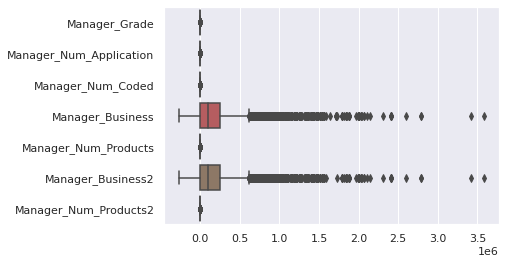

In [16]:
sns.boxplot(data=complete_numerical_cols,orient='h')

In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
train[manager_numerical_cols]=imputer.fit_transform(train[manager_numerical_cols])

In [18]:
train_object_cols=['Applicant_Gender', 'Applicant_Marital_Status','Applicant_Occupation',
'Applicant_Qualification','Manager_Joining_Designation', 'Manager_Current_Designation','Manager_Status',
'Manager_Gender']      

In [19]:
for col in train_object_cols:
        print(f'{col} \t number missing  {train[col].isnull().sum()} \t \t % missing {(train[col].isnull().sum()/len(train))*100:.2f}')      

Applicant_Gender 	 number missing  67 	 	 % missing 0.70
Applicant_Marital_Status 	 number missing  73 	 	 % missing 0.77
Applicant_Occupation 	 number missing  1221 	 	 % missing 12.82
Applicant_Qualification 	 number missing  86 	 	 % missing 0.90
Manager_Joining_Designation 	 number missing  683 	 	 % missing 7.17
Manager_Current_Designation 	 number missing  683 	 	 % missing 7.17
Manager_Status 	 number missing  683 	 	 % missing 7.17
Manager_Gender 	 number missing  683 	 	 % missing 7.17


we will fill the object columns with the mode of the respective features, as most of these values are less than
7 % of the data

In [20]:
# we are filling the na values with the mode of the categorical values
from sklearn.impute import SimpleImputer
object_imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
train[train_object_cols]=object_imputer.fit_transform(train[train_object_cols])

to fill the na values of the date feature, we will find the most frequent date for each feature, then parse the year,month,day seperately and fill the corresponding value from the most frequent date to these seperate values

In [21]:
date_cols=['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']

In [22]:
for date_ in date_cols:
    print(f'year {train[date_].dt.year.nunique()}, month {train[date_].dt.month.nunique()}, date {train[date_].dt.day.nunique()}')

year 2, month 12, date 31
year 61, month 12, date 31
year 8, month 12, date 31
year 34, month 12, date 31


In [23]:
# the most frequent date for each feature
for date_ in date_cols:
    print(f' {date_} mode {train[date_].mode().values}')
    print(" ")

 Application_Receipt_Date mode ['2007-05-09T00:00:00.000000000']
 
 Applicant_BirthDate mode ['1978-01-03T00:00:00.000000000']
 
 Manager_DOJ mode ['2007-07-09T00:00:00.000000000']
 
 Manager_DoB mode ['1961-02-11T00:00:00.000000000']
 


In [24]:
# we are creating individual features of year,month,day for each date object and appending to the dataset
for date_ in date_cols:
    train[str(date_)+'_year']=train[date_].dt.year
    train[str(date_)+'_month']=train[date_].dt.month
    train[str(date_)+'_day']=train[date_].dt.day    

In [25]:
train.head(n=2)

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_DOJ_year,Manager_DOJ_month,Manager_DOJ_day,Manager_DoB_year,Manager_DoB_month,Manager_DoB_day
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,2007,4,16,1971.0,12.0,19.0,2005.0,11.0,10.0,1978.0,2.0,17.0
FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,2007,4,16,1983.0,2.0,17.0,2005.0,11.0,10.0,1978.0,2.0,17.0


now we will remove the date columns using drop

In [26]:
train.drop(date_cols,inplace=True,axis=1)

now we are seperatley assigning mode values to the derived date columns

In [27]:
train['Applicant_BirthDate_year']=train.Applicant_BirthDate_year.fillna(int(2007))
train['Applicant_BirthDate_month']=train.Applicant_BirthDate_month.fillna(int(5))
train['Manager_DOJ_year']=train.Manager_DOJ_year.fillna(int(2007))
train['Manager_DOJ_month']=train.Manager_DOJ_month.fillna(int(1))
train['Manager_DoB_year']=train.Manager_DoB_year.fillna(int(1961))
train['Manager_DoB_month']=train.Manager_DoB_month.fillna(int(2))
train['Applicant_BirthDate_day']=train.Applicant_BirthDate_day.fillna(int(3))
train['Manager_DOJ_day']=train.Manager_DOJ_day.fillna(int(9))
train['Manager_DoB_day']=train.Manager_DoB_day.fillna(int(11))

In [28]:
# fill na values in Applicant_City_PIN with the mode as this is a categorical value
train['Applicant_City_PIN']=train.Applicant_City_PIN.fillna(int(train.Applicant_City_PIN.mode()))

In [29]:
# convert the feature from categorical to numerical 
train['Applicant_City_PIN']=train.Applicant_City_PIN.astype(int)

In [30]:
# create list of  categorical columns
cat_cols=['Applicant_Gender','Applicant_Marital_Status', 'Applicant_Occupation','Applicant_Qualification', 
 'Manager_Joining_Designation', 'Manager_Current_Designation','Manager_Status','Manager_Gender']

In [31]:
# reassign the categorical columns as categorical data type from object data type
train[cat_cols]=train[cat_cols].astype("category")

let us plot the distribution of values within the categorical variables

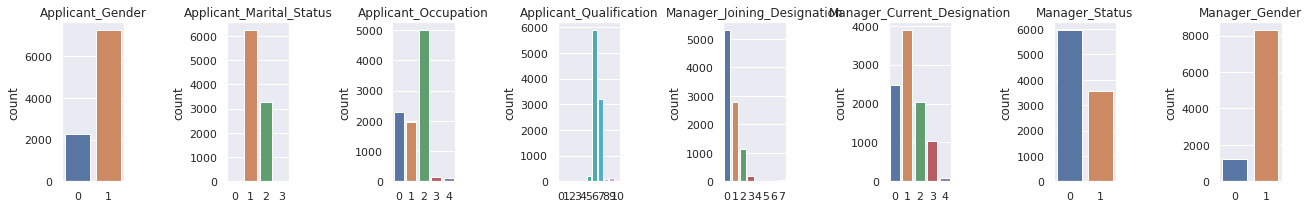

In [32]:
fig,axes=plt.subplots(1,8,figsize=(18,3))
for i in range(8):
    sns.countplot(train[cat_cols[i]].cat.codes,ax=axes[i]).set(title=cat_cols[i])
plt.tight_layout()    

we can see that for the variables, the categories are less than 10. hence there is no need to bin the values and we can do one hot encoding of the variables

In [33]:
pd.value_counts(train.Applicant_Qualification)

Class XII                                                           5892
Graduate                                                            3196
Class X                                                              225
Others                                                               132
Masters of Business Administration                                    74
Associate / Fellow of Institute of Chartered Accountans of India       3
Professional Qualification in Marketing                                1
Certified Associateship of Indian Institute of Bankers                 1
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Institute of Company Secretories of India          1
Associate/Fellow of Acturial Society of India                          1
Name: Applicant_Qualification, dtype: int64

In [34]:
pd.value_counts(train.Manager_Joining_Designation)

Level 1    5315
Level 2    2787
Level 3    1146
Level 4     200
Other        58
Level 6      18
Level 7       2
Level 5       1
Name: Manager_Joining_Designation, dtype: int64

In [35]:
pd.value_counts(train.Manager_Current_Designation)

Level 2    3891
Level 1    2479
Level 3    2033
Level 4    1031
Level 5      93
Name: Manager_Current_Designation, dtype: int64

we can see that Applicant_Qualification, Manager_Joining_Designation and Manager_Current_Designation have ordinal characteristics while all other categorical features have nominal characteristics

In [36]:
# all nominal values are converted to numerical values using one hot enconding
train=pd.get_dummies( train,columns=['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Manager_Status','Manager_Gender'], drop_first = True)

In [37]:
train.shape

(9527, 35)

#### transformation of the ordinal features in the dataset

In [38]:
pd.value_counts(train.Applicant_Qualification)

Class XII                                                           5892
Graduate                                                            3196
Class X                                                              225
Others                                                               132
Masters of Business Administration                                    74
Associate / Fellow of Institute of Chartered Accountans of India       3
Professional Qualification in Marketing                                1
Certified Associateship of Indian Institute of Bankers                 1
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Institute of Company Secretories of India          1
Associate/Fellow of Acturial Society of India                          1
Name: Applicant_Qualification, dtype: int64

In [39]:
app_qual_dict={'Class X':0,'Class XII':1,'Graduate':2,'Masters of Business Administration':3,'Others':4,'Associate / Fellow of Institute of Chartered Accountans of India':5,
               'Associate/Fellow of Acturial Society of India':5,'Associate/Fellow of Institute of Company Secretories of India':5,'Associate/Fellow of Insurance Institute of India':5,
              'Certified Associateship of Indian Institute of Bankers':5,'Professional Qualification in Marketing':5}

In [40]:
train['Applicant_Qualification']=train.Applicant_Qualification.map(app_qual_dict)

In [41]:
pd.value_counts(train.Manager_Joining_Designation)

Level 1    5315
Level 2    2787
Level 3    1146
Level 4     200
Other        58
Level 6      18
Level 7       2
Level 5       1
Name: Manager_Joining_Designation, dtype: int64

In [42]:
manag_jn_desg_dict={'Level 1':0,'Level 2':1,'Level 3':2,'Level 4':3,'Level 5':3,'Level 6':3,'Level 7':3,'Other':4}

In [43]:
train['Manager_Joining_Designation']=train.Manager_Joining_Designation.map(manag_jn_desg_dict)

In [44]:
train.Manager_Joining_Designation.dtype

dtype('int64')

In [45]:
pd.value_counts(train.Manager_Current_Designation)

Level 2    3891
Level 1    2479
Level 3    2033
Level 4    1031
Level 5      93
Name: Manager_Current_Designation, dtype: int64

In [46]:
train.Manager_Current_Designation.isna().sum()

0

In [47]:
manag_cur_desg_dict={'Level 1':0,'Level 2':1,'Level 3':2,'Level 4':3,'Level 5':4}

In [48]:
x=train.Manager_Current_Designation.cat.codes
train['Manager_Current_Designation']=x

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9527 entries, FIN1000001 to FIN1009527
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Office_PIN                          9527 non-null   int64  
 1   Applicant_City_PIN                  9527 non-null   int64  
 2   Applicant_Qualification             9527 non-null   int64  
 3   Manager_Joining_Designation         9527 non-null   int64  
 4   Manager_Current_Designation         9527 non-null   int8   
 5   Manager_Grade                       9527 non-null   float64
 6   Manager_Num_Application             9527 non-null   float64
 7   Manager_Num_Coded                   9527 non-null   float64
 8   Manager_Business                    9527 non-null   float64
 9   Manager_Num_Products                9527 non-null   float64
 10  Manager_Business2                   9527 non-null   float64
 11  Manager_Num_Products2            

for determining the model the independent variable and the feature variable are seperated

In [50]:
X_train=train.drop('Business_Sourced',axis=1)

In [51]:
X_train.shape

(9527, 34)

In [52]:
y_train=train.loc[:,'Business_Sourced']

In [53]:
y_train.shape

(9527,)

unscaled train data split into train and validation set

In [54]:
X_train_uns,X_val_uns,y_train_uns,y_val_uns=tts(X_train,y_train,test_size=0.2,random_state=42)

In [55]:
# Feature Scaling
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)

In [56]:
X_scaled=pd.DataFrame(X_scaled)
X_scaled.columns=X_train.columns

In [57]:
X_scaled.head(n=3)

,Office_PIN,Applicant_City_PIN,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_DOJ_year,Manager_DOJ_month,Manager_DOJ_day,Manager_DoB_year,Manager_DoB_month,Manager_DoB_day,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Manager_Status_Probation,Manager_Gender_M
0,1.651008,1.628593,1.005529,-0.756717,-0.203566,-0.223319,0.061187,0.254327,0.590431,2.577030,0.601998,2.584344,-0.699993,-0.867378,0.134365,-0.379950,1.747915,0.660536,-0.503502,1.242778,-0.534163,0.894834,-1.132427,0.421253,0.561065,0.724099,-0.722416,-0.025104,1.961092,-1.052715,-0.126049,-0.103513,-0.773621,0.382688
1,1.651008,1.628555,-0.596424,-0.756717,-0.203566,-0.223319,0.061187,0.254327,0.590431,2.577030,0.601998,2.584344,-0.699993,-0.867378,0.134365,0.748821,-1.212667,0.426576,-0.503502,1.242778,-0.534163,0.894834,-1.132427,0.421253,0.561065,-1.381026,1.384244,-0.025104,1.961092,-1.052715,-0.126049,-0.103513,-0.773621,0.382688
2,1.472799,1.628514,-0.596424,-0.756717,-1.226979,-1.134088,-0.897574,-0.606410,0.673043,2.086214,0.685496,2.092592,-0.699993,-0.867378,0.134365,-0.850271,-1.508725,0.309597,0.059180,-0.510293,1.485884,-0.426293,-0.832460,-1.262724,0.561065,0.724099,-0.722416,-0.025104,-0.509920,-1.052715,-0.126049,-0.103513,-0.773621,0.382688


let us create a small validation set to test our model.we shall split the train data into 80 % train and 20 % validation and check the performance
of our model on the validation set 

In [58]:
X_scaled,X_val,y_train,y_val=tts(X_scaled,y_train,test_size=0.2,random_state=42)

In [59]:
X_scaled.shape,X_val.shape,y_train.shape,y_val.shape

((7621, 34), (1906, 34), (7621,), (1906,))

## Logistic Regression Model

In [60]:
lr_model=LogisticRegression(solver='liblinear',class_weight='balanced')
fitted_lr_model=lr_model.fit(X_scaled,y_train)

now let us see how the model trained on training data perfoms on the validation data

In [61]:
y_pred=fitted_lr_model.predict(X_scaled)

In [62]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63      5005
           1       0.41      0.60      0.49      2616

    accuracy                           0.57      7621
   macro avg       0.57      0.58      0.56      7621
weighted avg       0.62      0.57      0.58      7621



In [63]:
y_pred=fitted_lr_model.predict(X_val)
y_pred_probability=fitted_lr_model.predict_proba(X_val)

In [64]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63      1255
           1       0.40      0.57      0.47       651

    accuracy                           0.56      1906
   macro avg       0.56      0.56      0.55      1906
weighted avg       0.61      0.56      0.58      1906



We can see that model is not efficient. The low recall shows the model predicts a lot of false negatives. The high number of false negatives also
has brought down the accuracy of the model. The model also predicts a large number of false positives for class 1 in precision

### ROC-AUC curve

In [65]:
fpr,tpr,threshold=roc_curve(y_val,y_pred_probability[:,1])

0.5972117673698447

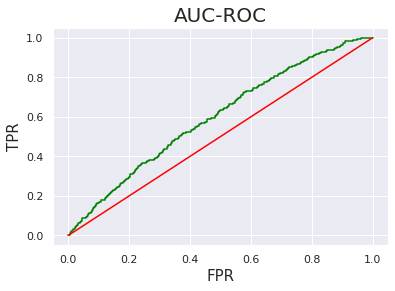

In [66]:
plt.figure()
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
roc_auc_score(y_val,y_pred_probability[:,1])

### Coefficient Plot

In [67]:
#arranging the data
c=fitted_lr_model.coef_.reshape(-1)
x=X_scaled.columns
coeff_plot=pd.DataFrame({'coefficients':c,'variable':x})
#sorting the values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
30,-0.839058,Applicant_Occupation_Self Employed
25,-0.376076,Applicant_Marital_Status_M
26,-0.321492,Applicant_Marital_Status_S
8,-0.230505,Manager_Business
4,-0.178075,Manager_Current_Designation


Text(0.5, 1.0, 'Coefficient ')

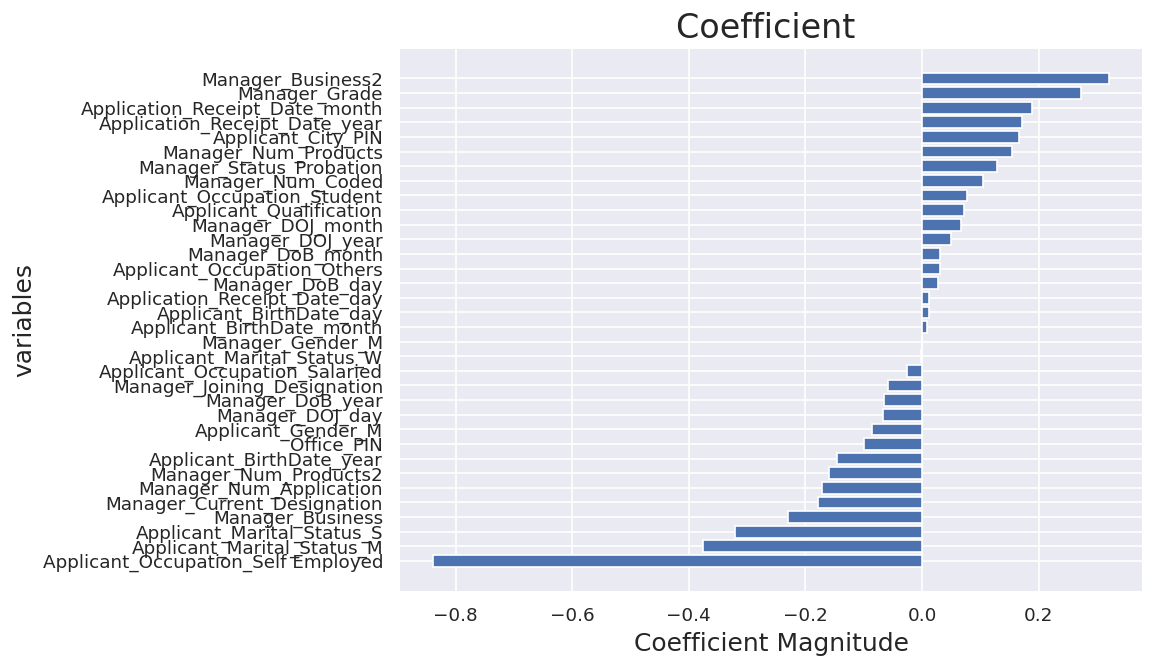

In [68]:
plt.figure(figsize=(8,6),dpi=120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel("Coefficient Magnitude",fontsize=15)
plt.ylabel("variables",fontsize=15)
plt.title("Coefficient ",fontsize=20)

## Bagging Model

In [69]:
from sklearn.ensemble import BaggingClassifier as BC
bag_classifier = BC(n_estimators = 150,random_state = 42)
bag_classifier.fit(X_scaled,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=150,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

this is a tree based model and does not require a scaled dataset, however since we have the scaled data, we shall use it here for this model

In [70]:
bag_classifier.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
# parameters of the classifier
bag_classifier.max_features,bag_classifier.max_samples,bag_classifier.n_classes_,bag_classifier.n_estimators

(1.0, 1.0, 2, 150)

In [72]:
bag_class_y_pred=bag_classifier.predict(X_scaled)

In [73]:
bag_class_y_pred_val=bag_classifier.predict(X_val)

In [74]:
# bagging model with decision tree classifier on train data
print(classification_report(y_train, bag_class_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5005
           1       1.00      1.00      1.00      2616

    accuracy                           1.00      7621
   macro avg       1.00      1.00      1.00      7621
weighted avg       1.00      1.00      1.00      7621



In [75]:
# bagging model with decision tree classifier on validation data
print(classification_report(y_val, bag_class_y_pred_val))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1255
           1       0.48      0.23      0.31       651

    accuracy                           0.65      1906
   macro avg       0.58      0.55      0.54      1906
weighted avg       0.62      0.65      0.61      1906



this appears to be a case of overfitting as the train data fits well, but the validation data fits poorly

In [76]:
from sklearn.linear_model import LogisticRegression as LR

bag_clf_lr = BC(base_estimator = LR(solver='liblinear',class_weight='balanced'),
                n_estimators = 150,
                n_jobs = -1,
                random_state = 42)
bag_clf_lr.fit(X_scaled, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                    class_weight='balanced',
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='liblinear',
                                                    tol=0.0001, verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=150, n_j

In [77]:
bag_clf_lr.base_estimator

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
bag_class_y_pred = bag_clf_lr.predict(X_scaled)

In [79]:
bag_class_y_pred_val=bag_clf_lr.predict(X_val)

In [80]:
# bagging model with decision tree classifier on train data
print(classification_report(y_train, bag_class_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63      5005
           1       0.41      0.60      0.49      2616

    accuracy                           0.57      7621
   macro avg       0.57      0.58      0.56      7621
weighted avg       0.62      0.57      0.58      7621



In [81]:
# bagging model with decision tree classifier on validation data
print(classification_report(y_val, bag_class_y_pred_val))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63      1255
           1       0.40      0.57      0.47       651

    accuracy                           0.57      1906
   macro avg       0.56      0.57      0.55      1906
weighted avg       0.61      0.57      0.58      1906



bagging did not improve the quality of the model

### Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf_clf = RFC()
rf_clf.fit(X_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
rfclf_y_pred = rf_clf.predict(X_scaled)
print(classification_report(y_train,rfclf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5005
           1       1.00      1.00      1.00      2616

    accuracy                           1.00      7621
   macro avg       1.00      1.00      1.00      7621
weighted avg       1.00      1.00      1.00      7621



In [84]:
rfclf_y_pred_val=rf_clf.predict(X_val)
print(classification_report(y_val,rfclf_y_pred_val))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77      1255
           1       0.49      0.20      0.29       651

    accuracy                           0.65      1906
   macro avg       0.58      0.55      0.53      1906
weighted avg       0.62      0.65      0.61      1906



since this treee based model is overfitting, we will carry out hyperparameter tuning to optimize the model

In [85]:
# paramters of the model suitable for hyperparameter tuning
rf_clf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [86]:
rf_clf.n_estimators

100

first we shall define 2 helper function

In [87]:
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1,y1)
    predict = model.predict(x1)
    f1 = f1_score(y1, predict)
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    return f1, f2

In [88]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (7,4), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
    plt.title(title)
    plt.legend()
    plt.xlabel("parameter_value")
    plt.ylabel("f1 score")
    plt.show()

now we shall optimize each individual hyperparameter

In [89]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:  
    model = RFC(class_weight = 'balanced_subsample',
              n_estimators = i,
              n_jobs = -1,
              max_depth = 7,
              random_state = 101)
    f1, f2 = calc_score(model, X_scaled, y_train, X_val, y_val)
    train.append(f1)
    test.append(f2)

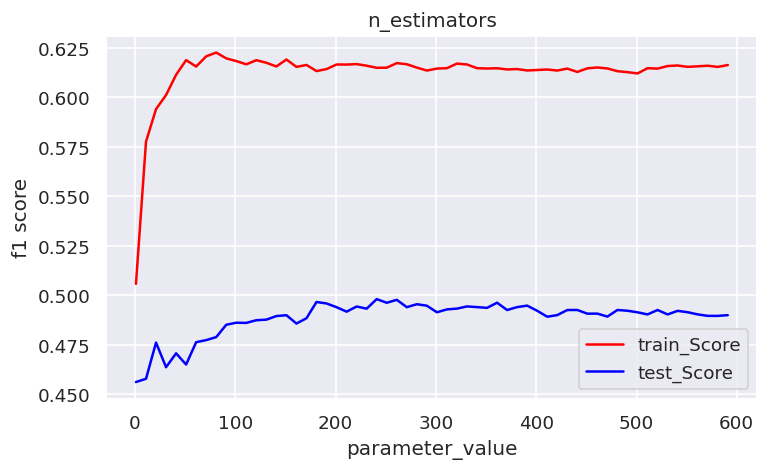

In [90]:
effect( train, test, range(1,600,10) , 'n_estimators')

In [91]:
maxsamples = [i/1000 for i in range(1,1000)]
train = []
test = []
for i in maxsamples:
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 50, n_jobs = -1, max_depth = 7, random_state = 101, max_samples = i)
    f1, f2 = calc_score(model, X_scaled, y_train, X_val, y_val)
    train.append(f1)
    test.append(f2)

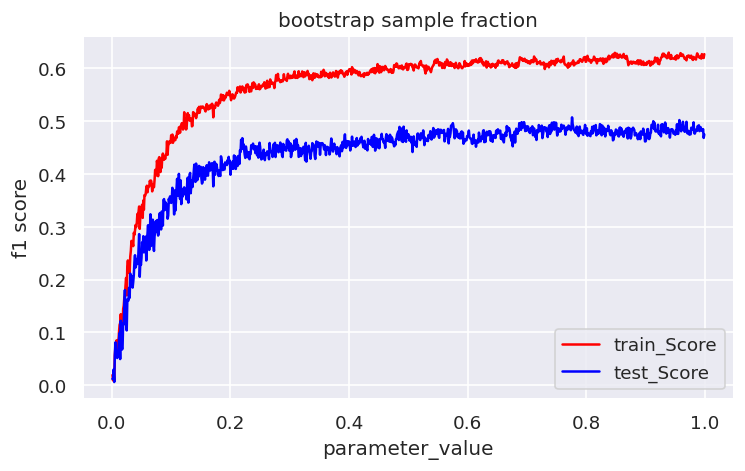

In [92]:
effect( train, test, maxsamples , 'bootstrap sample fraction')

In [93]:
maxfeatures = range(1,X_scaled.shape[1])
train = []
test = []

for i in maxfeatures:
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = 7, random_state = 101, max_features = i,max_samples=0.7)
    f1, f2 = calc_score(model,X_scaled,y_train,X_val,y_val)
    train.append(f1)
    test.append(f2)

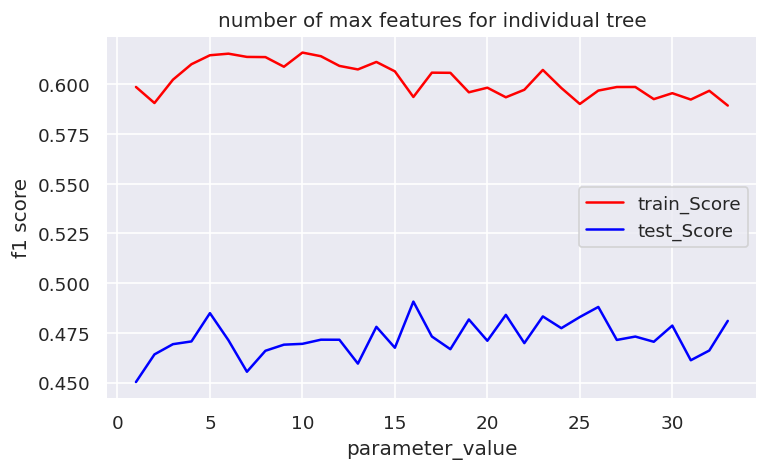

In [94]:
effect( train, test, maxfeatures , 'number of max features for individual tree')

In [95]:
maxdepth = [i for i in range(50)]
train = []
test = []

for i in maxfeatures:
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = i, random_state = 101, max_features = 20,max_samples=0.7)
    f1, f2 = calc_score(model,X_scaled,y_train,X_val,y_val)
    train.append(f1)
    test.append(f2)

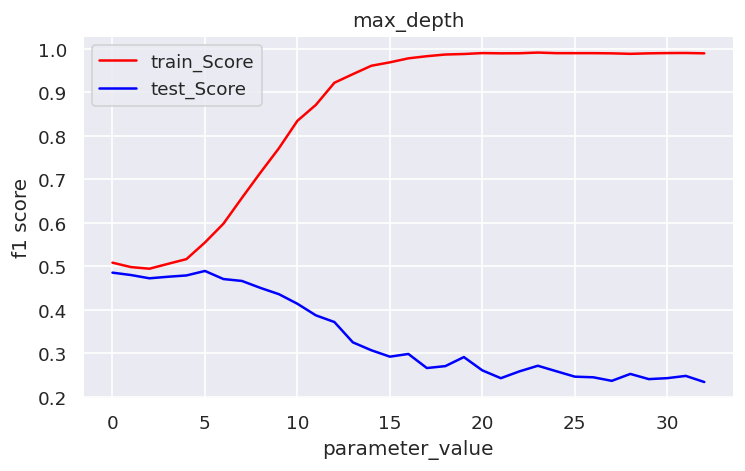

In [96]:
effect( train, test, range(33) , 'max_depth')

In [97]:
minsample = [i for i in range(2,5000,25)]
train = []
test = []

for i in minsample:
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = 5, random_state = 101, max_features = 20,max_samples=0.7,min_samples_split=i)
    f1, f2 = calc_score(model,X_scaled,y_train,X_val,y_val)
    train.append(f1)
    test.append(f2)

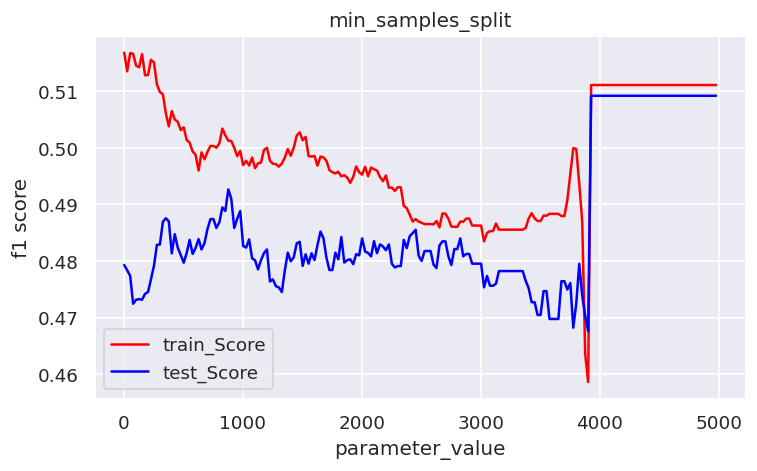

In [98]:
effect( train, test, minsample , 'min_samples_split')

In [99]:
maxleafnode = [i for i in range(2,20)]
train = []
test = []

for i in maxleafnode:
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = 5, 
                random_state = 101, max_features = 20,max_samples=0.7,min_samples_split=900,max_leaf_nodes=i)
    f1, f2 = calc_score(model,X_scaled,y_train,X_val,y_val)
    train.append(f1)
    test.append(f2)

In [100]:
len(train),len(test)

(18, 18)

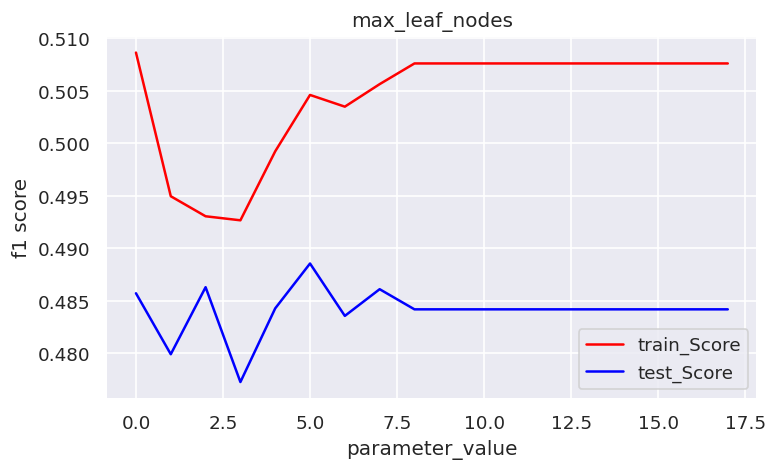

In [101]:
effect( train, test, range(18), 'max_leaf_nodes')

#### Random Forest model with optimized parameters

In [239]:
rf_clf = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = 5, random_state = 101, max_features = 20,
             max_samples=0.7,min_samples_split=900,max_leaf_nodes=5)
rf_clf.fit(X_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=5, max_features=20, max_leaf_nodes=5,
                       max_samples=0.7, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=900, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [103]:
rfclf_y_pred = rf_clf.predict(X_scaled)
print(classification_report(y_train,rfclf_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.54      0.62      5005
           1       0.41      0.62      0.49      2616

    accuracy                           0.56      7621
   macro avg       0.57      0.58      0.56      7621
weighted avg       0.62      0.56      0.58      7621



In [104]:
rfclf_y_pred_val=rf_clf.predict(X_val)
print(classification_report(y_val,rfclf_y_pred_val))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62      1255
           1       0.40      0.59      0.48       651

    accuracy                           0.56      1906
   macro avg       0.56      0.57      0.55      1906
weighted avg       0.61      0.56      0.57      1906



In [159]:
rf_clf_cls1=rf_clf.predict_proba(X_scaled)[:,1].tolist()

calculate the probability of prediction of class 1 by random forest classifier

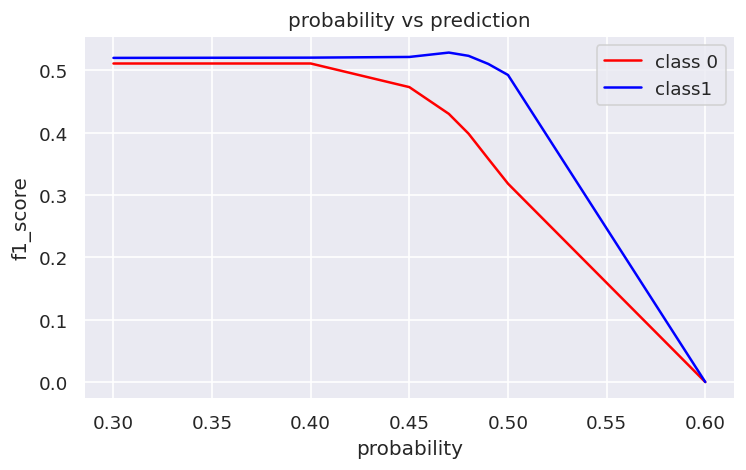

In [237]:
def prob_cal(feature_array):
  plt.figure(figsize=(7,4),dpi=120)  
  rf_clf_cls1=rf_clf.predict_proba(feature_array)[:,1].tolist()
  rf_clf_cls0=rf_clf.predict_proba(feature_array)[:,0].tolist()
  prob_list=[0.3,0.4,0.45,0.47,0.48,0.49,0.5,0.6]
  #pred_dict={}
  cls0=[]
  cls1=[]

  for num in prob_list:
    num_list_0= list(map(lambda x:1 if x>num else 0,rf_clf_cls0))
    num_list_1= list(map(lambda x:1 if x>num else 0,rf_clf_cls1))
    f1_0=f1_score(y_train,num_list_0)
    f1_1=f1_score(y_train,num_list_1)
    cls0.append(f1_0)
    cls1.append(f1_1)
    f1_1=f1_score(y_train,num_list_1)
    #print(f'probability {num} f1_score class1 {f1_score(y_train,num_list_1):.2f}')
  plt.plot(prob_list,cls0,color='red',label='class 0')
  plt.plot(prob_list,cls1,color='blue',label='class1')
  plt.xlabel('probability')
  plt.ylabel('f1_score')
  plt.legend()
  plt.title('probability vs prediction')

prob_cal(X_scaled)
#pd.DataFrame(pred_dict)  

### Random Forest model with unscaled training data

In [222]:
rf_clf = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = 5, random_state = 101, max_features = 20,
             max_samples=0.7,min_samples_split=900,max_leaf_nodes=5)
rf_clf.fit(X_train_uns,y_train_uns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=5, max_features=20, max_leaf_nodes=5,
                       max_samples=0.7, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=900, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [106]:
rfclf_y_pred_uns = rf_clf.predict(X_train_uns)
print(classification_report(y_train_uns,rfclf_y_pred_uns))

              precision    recall  f1-score   support

           0       0.73      0.54      0.62      5005
           1       0.41      0.62      0.49      2616

    accuracy                           0.56      7621
   macro avg       0.57      0.58      0.56      7621
weighted avg       0.62      0.56      0.58      7621



In [107]:
rfclf_y_pred_val_uns=rf_clf.predict(X_val_uns)
print(classification_report(y_val_uns,rfclf_y_pred_val_uns))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62      1255
           1       0.40      0.59      0.48       651

    accuracy                           0.56      1906
   macro avg       0.56      0.57      0.55      1906
weighted avg       0.61      0.56      0.57      1906



#### Random Forest with entropy

In [108]:
rf_clf_ent = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = 5, random_state = 101, max_features = 20,
             max_samples=0.7,min_samples_split=900,max_leaf_nodes=5,criterion='entropy')
rf_clf_ent.fit(X_train_uns,y_train_uns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=5, max_features=20, max_leaf_nodes=5,
                       max_samples=0.7, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=900, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [109]:
rfclf_y_pred_uns = rf_clf_ent.predict(X_train_uns)
print(classification_report(y_train_uns,rfclf_y_pred_uns))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60      5005
           1       0.41      0.65      0.50      2616

    accuracy                           0.55      7621
   macro avg       0.57      0.58      0.55      7621
weighted avg       0.62      0.55      0.56      7621



In [110]:
rfclf_y_pred_val_uns=rf_clf_ent.predict(X_val_uns)
print(classification_report(y_val_uns,rfclf_y_pred_val_uns))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59      1255
           1       0.40      0.63      0.49       651

    accuracy                           0.55      1906
   macro avg       0.56      0.57      0.54      1906
weighted avg       0.61      0.55      0.56      1906



Implementation of Kfold cross validation for the Random Forest tree

In [111]:
X_train_uns.head(n=2)

,Office_PIN,Applicant_City_PIN,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_DOJ_year,Manager_DOJ_month,Manager_DOJ_day,Manager_DoB_year,Manager_DoB_month,Manager_DoB_day,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Manager_Status_Probation,Manager_Gender_M
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FIN1005696,380015,380050,1,2,2,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2007,12,4,1985.0,7.0,18.0,2007.0,11.0,3.0,1975.0,4.0,30.0,1,0,1,0,0,1,0,0,1,1
FIN1007301,284001,284204,2,0,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2008,2,23,1987.0,2.0,28.0,2008.0,1.0,7.0,1985.0,1.0,20.0,0,0,1,0,0,0,0,0,1,0


In [112]:
cv_train=X_train_uns.reset_index(drop=True)
cv_train.head(n=2)

,Office_PIN,Applicant_City_PIN,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_DOJ_year,Manager_DOJ_month,Manager_DOJ_day,Manager_DoB_year,Manager_DoB_month,Manager_DoB_day,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Manager_Status_Probation,Manager_Gender_M
0,380015,380050,1,2,2,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2007,12,4,1985.0,7.0,18.0,2007.0,11.0,3.0,1975.0,4.0,30.0,1,0,1,0,0,1,0,0,1,1
1,284001,284204,2,0,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2008,2,23,1987.0,2.0,28.0,2008.0,1.0,7.0,1985.0,1.0,20.0,0,0,1,0,0,0,0,0,1,0


In [113]:
y_train_uns.head(n=2)

ID
FIN1005696    0
FIN1007301    0
Name: Business_Sourced, dtype: int64

In [114]:
cv_y=y_train_uns.reset_index(drop=True)
cv_y.head(n=2)

0    0
1    0
Name: Business_Sourced, dtype: int64

In [115]:
rf_clf = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = 5, random_state = 101, max_features = 20,
             max_samples=0.7,min_samples_split=900,max_leaf_nodes=5)

In [149]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.

from sklearn.model_selection import StratifiedKFold


i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
f1_list_tst = []
f1_list_trn=[]
for train_index,test_index in kf.split(cv_train,cv_y):
  #print(len(cv_train),len(cv_y))  
  xtr,xvl = cv_train.loc[train_index],cv_train.loc[test_index]     
  ytr,yvl = cv_y[train_index],cv_y[test_index]         
  model = rf_clf # optimized Random Forest model     
  model.fit(xtr,ytr)     
  pred_train=model.predict_proba(xtr)
  pred_test = model.predict_proba(xvl)     
  score_tst = roc_auc_score(yvl,pred_test[:,1]) 
  score_trn = roc_auc_score(ytr,pred_train[:,1])
  f1_list_tst.append(score_tst)      
  f1_list_trn.append(score_trn)
  print('test {:.2f}'.format(score_tst))
  print('train {:.2f}'.format(score_trn))
  
print("Mean roc_auc_score across the fold train {:.2f}".format(sum(f1_list_trn)/len(f1_list_trn)))    
print("Mean roc_auc across the fold test {:.2f}".format(sum(f1_list_tst)/len(f1_list_tst)))    
    

test 0.59
train 0.63
test 0.60
train 0.63
test 0.61
train 0.63
test 0.59
train 0.63
test 0.62
train 0.63
Mean roc_auc_score across the fold train 0.63
Mean roc_auc across the fold test 0.60


cross validation has not improved the accuracy of the model

In [117]:
critical_list=['Manager_Business2','Manager_Grade','Application_Receipt_Date_month',
  'Application_Receipt_Date_year','Applicant_City_PIN','Manager_Num_Products',
  'Manager_Status_Probation','Manager_Num_Application','Manager_Current_Designation',
  'Manager_Business','Applicant_Marital_Status_S','Applicant_Marital_Status_M',
 'Applicant_Occupation_Self Employed']


In [118]:
cv_critical=cv_train[critical_list]

In [119]:
rf_clf = RFC(class_weight = 'balanced_subsample', n_estimators = 50,n_jobs = -1, max_depth = 5, random_state = 101,
             max_samples=0.7,min_samples_split=900,max_leaf_nodes=5)

In [120]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
f1_list = []
for train_index,test_index in kf.split(cv_critical,cv_y):
  #print(len(cv_train),len(cv_y))  
  xtr,xvl = cv_critical.loc[train_index],cv_critical.loc[test_index]     
  ytr,yvl = cv_y[train_index],cv_y[test_index]         
  model = rf_clf # optimized Random Forest model     
  model.fit(xtr,ytr)     
  pred_test = model.predict(xvl)     
  score = f1_score(yvl,pred_test) 
  f1_list.append(score)
           
print("Mean f1_score across the fold is : ",sum(f1_list)/len(f1_list))    


Mean f1_score across the fold is :  0.45495938664839797


# Prediction of test data

#### read the test data

In [121]:
test=pd.read_csv('test.csv',parse_dates=['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'])

In [122]:
test.sample(10)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
2923,FIN1012451,848101,2008-09-29,848101.0,M,1966-12-27,M,Others,Class XII,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3496,FIN1013024,474008,2008-10-29,474011.0,M,1989-10-13,M,Salaried,Class XII,2008-09-05,Level 2,Level 2,3.0,Probation,M,1972-07-12,2.0,0.0,0.0,0.0,0.0,0.0
1752,FIN1011280,400705,2008-08-11,400602.0,F,1983-05-30,S,Salaried,Graduate,2008-08-04,Level 2,Level 2,3.0,Probation,M,1973-12-01,0.0,0.0,0.0,0.0,0.0,0.0
2309,FIN1011837,233001,2008-09-05,232328.0,M,1983-02-25,M,Salaried,Graduate,2008-07-31,Level 1,Level 1,2.0,Probation,M,1978-07-14,10.0,5.0,46934.0,3.0,46934.0,3.0
3153,FIN1012681,600017,2008-10-08,636009.0,M,1981-05-25,M,Salaried,Graduate,2008-09-10,Level 3,Level 3,4.0,Probation,M,1976-07-07,1.0,0.0,0.0,0.0,0.0,0.0
273,FIN1009801,201301,2008-07-08,201002.0,M,1972-08-26,M,Business,Graduate,2007-07-12,Level 3,Level 3,4.0,Confirmation,M,1976-04-03,2.0,0.0,60000.0,2.0,60000.0,2.0
2008,FIN1011536,695014,2008-08-15,695522.0,F,1957-03-03,M,Others,Graduate,2006-06-12,Level 4,Level 4,5.0,Confirmation,F,1955-05-27,9.0,2.0,109116.0,3.0,109116.0,3.0
3919,FIN1013447,713303,2008-11-20,713325.0,F,1987-10-18,S,Business,Class XII,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1248,FIN1010776,211001,2008-07-29,211001.0,M,1975-02-12,M,Salaried,Graduate,2008-05-28,Level 1,Level 1,2.0,Probation,M,1976-07-08,1.0,1.0,0.0,0.0,0.0,0.0
2528,FIN1012056,843302,2008-09-10,843314.0,M,1963-07-07,M,Self Employed,Graduate,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


#### Now we will convert categorical data to numerical data for use in ML models. we will perform the same transformations on the test data as on the train data for use in ML models

In [123]:
test.set_index('ID',drop=True,inplace=True) # ID is not important for ML and serves better purpose as index

In [124]:
test[manager_numerical_cols]=imputer.transform(test[manager_numerical_cols]) # convert manager related categorical columns to numerical values

In [125]:
test[train_object_cols]=object_imputer.fit_transform(test[train_object_cols]) # transform the remaining object columns

In [126]:
# we are seperately extracting the year, month and day
for date_ in date_cols:                       
    test[str(date_)+'_year']=test[date_].dt.year
    test[str(date_)+'_month']=test[date_].dt.month
    test[str(date_)+'_day']=test[date_].dt.day    

In [127]:
test.drop(date_cols,inplace=True,axis=1)

In [128]:
# we are seperately assigning the year,month,day values from the mode of Date obtianed for each feature
test['Applicant_BirthDate_year']=test.Applicant_BirthDate_year.fillna(int(2007))  
test['Applicant_BirthDate_month']=test.Applicant_BirthDate_month.fillna(int(5))
test['Manager_DOJ_year']=test.Manager_DOJ_year.fillna(int(2007))
test['Manager_DOJ_month']=test.Manager_DOJ_month.fillna(int(1))
test['Manager_DoB_year']=test.Manager_DoB_year.fillna(int(1961))
test['Manager_DoB_month']=test.Manager_DoB_month.fillna(int(2))
test['Applicant_BirthDate_day']=test.Applicant_BirthDate_day.fillna(int(3))
test['Manager_DOJ_day']=test.Manager_DOJ_day.fillna(int(9))
test['Manager_DoB_day']=test.Manager_DoB_day.fillna(int(11))

In [129]:
test['Applicant_City_PIN']=test.Applicant_City_PIN.fillna(int(test.Applicant_City_PIN.mode()))
test['Applicant_City_PIN']=test.Applicant_City_PIN.astype(int)

In [130]:
# transformation of categorical columns
test[cat_cols]=test[cat_cols].astype("category")

In [131]:
# all nominal values are converted to numerical values by one hot encoding
test=pd.get_dummies( test,columns=['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Manager_Status','Manager_Gender'], drop_first = True)

In [132]:
# transformation of the ordinal features
test['Applicant_Qualification']=test.Applicant_Qualification.map(app_qual_dict)
test['Manager_Joining_Designation']=test.Manager_Joining_Designation.map(manag_jn_desg_dict)
test['Manager_Current_Designation']=test.Manager_Current_Designation.cat.codes

In [133]:
#one column in Applicant_Qualification is missing in test. hence we can drop that observation
test[test.Applicant_Qualification.isna()].index
test.loc['FIN1014135','Applicant_Qualification']=test.Applicant_Qualification.median()
print(test.Applicant_Qualification.isna().sum())
print(test.shape)

0
(5045, 34)


In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5045 entries, FIN1009528 to FIN1014572
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Office_PIN                          5045 non-null   int64  
 1   Applicant_City_PIN                  5045 non-null   int64  
 2   Applicant_Qualification             5045 non-null   float64
 3   Manager_Joining_Designation         5045 non-null   int64  
 4   Manager_Current_Designation         5045 non-null   int8   
 5   Manager_Grade                       5045 non-null   float64
 6   Manager_Num_Application             5045 non-null   float64
 7   Manager_Num_Coded                   5045 non-null   float64
 8   Manager_Business                    5045 non-null   float64
 9   Manager_Num_Products                5045 non-null   float64
 10  Manager_Business2                   5045 non-null   float64
 11  Manager_Num_Products2            

In [135]:
# this is the actual test data
scaled_test=sc_X.transform(test)

In [136]:
scaled_test=pd.DataFrame(scaled_test)
scaled_test.columns=X_scaled.columns
scaled_test.head(n=3)

,Office_PIN,Applicant_City_PIN,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Application_Receipt_Date_year,Application_Receipt_Date_month,Application_Receipt_Date_day,Applicant_BirthDate_year,Applicant_BirthDate_month,Applicant_BirthDate_day,Manager_DOJ_year,Manager_DOJ_month,Manager_DOJ_day,Manager_DoB_year,Manager_DoB_month,Manager_DoB_day,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Manager_Status_Probation,Manager_Gender_M
0,-0.716627,-0.710819,1.005529,-0.756717,-1.226979,-1.134088,-0.418194,-0.60641,-0.672187,-0.858684,-0.674169,-0.857921,1.428585,0.091192,-1.598007,0.654757,0.563682,-0.977181,1.184543,-0.510293,1.367057,0.894834,1.267314,0.060401,0.561065,-1.381026,1.384244,-0.025104,-0.50992,0.949924,-0.126049,-0.103513,1.292622,-2.613095
1,1.472799,1.444428,1.005529,-0.756717,-1.226979,-1.134088,0.061187,-0.60641,-0.672187,-0.858684,-0.674169,-0.857921,1.428585,0.091192,-1.598007,-0.662142,-0.916609,-0.275302,1.184543,-0.218114,1.129405,-0.132709,-0.832460,-1.262724,0.561065,0.724099,-0.722416,-0.025104,-0.50992,0.949924,-0.126049,-0.103513,1.292622,0.382688
2,1.472799,0.157921,1.005529,0.450053,0.819848,-0.223319,-0.418194,-0.60641,-0.287364,-0.245163,-0.286982,-0.243231,1.428585,0.091192,-1.598007,0.842885,1.747915,0.309597,0.621861,-1.679007,-0.652990,-1.600627,-1.132427,-0.300451,0.561065,-1.381026,1.384244,-0.025104,-0.50992,0.949924,-0.126049,-0.103513,1.292622,0.382688


### Prediction with Logistic Regression

In [137]:
y_pred_test=fitted_lr_model.predict(scaled_test)
y_pred_probability_test=fitted_lr_model.predict_proba(scaled_test)

In [138]:
y_pred_test

array([1, 1, 1, ..., 1, 0, 1])

In [139]:
test.shape,y_pred_test.shape

((5045, 34), (5045,))

In [140]:
submit_solution=pd.DataFrame({'ID':test.index,'Business_Sourced':y_pred_test})
submit_solution.head()

,ID,Business_Sourced
0,FIN1009528,1
1,FIN1009529,1
2,FIN1009530,1
3,FIN1009531,1
4,FIN1009532,1


In [141]:
submit_solution.to_csv("solution_file.csv",index=False)

### Predicting with Bagging Model using Decision Tree base estimator

In [142]:
bag_y_pred_test=bag_classifier.predict(scaled_test)
bag_y_pred_prob_test=bag_classifier.predict_proba(scaled_test)

In [143]:
bag_y_pred_test

array([0, 0, 0, ..., 1, 0, 0])

In [144]:
test.shape,bag_y_pred_test.shape

((5045, 34), (5045,))

In [145]:
submit_solution=pd.DataFrame({'ID':test.index,'Business_Sourced':bag_y_pred_test})
submit_solution.head()

,ID,Business_Sourced
0,FIN1009528,0
1,FIN1009529,0
2,FIN1009530,0
3,FIN1009531,0
4,FIN1009532,0


In [146]:
submit_solution.to_csv("solution_file_bagging.csv",index=False)

### Predicting with Random Forest Classifier

In [150]:
rfclf_y_pred_test=rf_clf.predict(scaled_test)
rfclf_y_pred_prob_test=rf_clf.predict_proba(scaled_test)

In [151]:
rfclf_y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
test.shape,rfclf_y_pred_test.shape

((5045, 34), (5045,))

In [ ]:
submit_solution=pd.DataFrame({'ID':test.index,'Business_Sourced':rfclf_y_pred_test})
submit_solution.head()

In [ ]:
submit_solution.to_csv("solution_file_randomforest.csv",index=False)

#### Prediction with Random Forest classifier with unscaled data

In [ ]:
rfclf_y_pred_test=rf_clf.predict(test)
rfclf_y_pred_prob_test=rf_clf.predict_proba(test)

In [ ]:
rfclf_y_pred_test

In [ ]:
test.shape,rfclf_y_pred_test.shape

In [ ]:
submit_solution=pd.DataFrame({'ID':test.index,'Business_Sourced':rfclf_y_pred_test})
submit_solution.head()

In [ ]:
submit_solution.to_csv("solution_file_randomforest_unscaled.csv",index=False)

#### Random Forest with entropy criterion

In [ ]:
rfclf_y_test_uns_ent=rf_clf_ent.predict(test)
rfclf_y_prob_test_uns_ent=rf_clf.predict_proba(test)

In [ ]:
submit_solution=pd.DataFrame({'ID':test.index,'Business_Sourced':rfclf_y_test_uns_ent})
submit_solution.head()

In [ ]:
submit_solution.to_csv("soln_file_RF_unscaled_entropy.csv",index=False)

In [262]:
submit_solution.value_counts('Business_Sourced')

Business_Sourced
1    4017
0    1028
dtype: int64

prediction with Random Forest with optimized prediction probability of 0.4

In [250]:
y_pred_proba=rf_clf.predict_proba(scaled_test)

In [251]:
cls_test1=y_pred_proba[:,1].tolist()

In [267]:
y_pred_test=[1 if val>0.45 else 0 for val in cls_test1]

In [268]:
submit_solution=pd.DataFrame({'ID':test.index,'Business_Sourced':y_pred_test})
submit_solution.head()

,ID,Business_Sourced
0,FIN1009528,1
1,FIN1009529,1
2,FIN1009530,1
3,FIN1009531,1
4,FIN1009532,1


In [269]:
submit_solution.value_counts('Business_Sourced')

Business_Sourced
1    4711
0     334
dtype: int64

In [270]:
submit_solution.to_csv("soln_file_RF_prob.csv",index=False)